In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

In [2]:
# loading the data
notebook_dir = Path.cwd()

# creating path variables
csv_dir = notebook_dir.parent.absolute() / 'clean_csvs'
visuals_dir = notebook_dir.parent.absolute() / 'visuals'
csv_dir_grouped = csv_dir / 'messages_grouped_by_user'

# dataframes
mega = pd.read_csv(csv_dir / 'all-messages.csv')


C:\Users\Roo\AppData\Local\Temp\ipykernel_9028\3189200173.py:10: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  mega = pd.read_csv(csv_dir / 'all-messages.csv')


In [3]:
df = mega.copy()

df['date'] = pd.to_datetime(df['date'])

# Step 3: Sort the DataFrame by the date column
df_sorted = df.sort_values(by='date')

mega = df_sorted

In [4]:
def responseTimeColumn(df):

    df['date'] = pd.to_datetime(df['date'])

    # Step 3: Calculate time differences
    # Ensure DataFrame is sorted by time to correctly calculate differences
    df = df.sort_values(by='date')
    df['response time'] = df['date'].diff()

    # Convert the 'timedelta_column' to timedelta dtype
    df['response time'] = pd.to_timedelta(df['response time'])

    # Convert timedelta to decimal hours
    return(df['response time'].dt.total_seconds() / 86400)


In [5]:
imsg_df = pd.read_csv(csv_dir_grouped / 'aarush-imessage-grouped.csv')
discord_df = pd.read_csv(csv_dir_grouped / 'aarush-discord-grouped.csv')
ig_df = pd.read_csv(csv_dir_grouped / 'aarush-instagram-grouped.csv')
msngr_df = pd.read_csv(csv_dir_grouped / 'aarush-messenger-grouped.csv')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_date_vs_response_time(df, date_col, response_time_col, platform_col = None):
    """
    Plots date vs response time for a given DataFrame.
    Removes entries with response time over 2 days and displays response time in days.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    date_col (str): Name of the column containing date values.
    response_time_col (str): Name of the column containing response time values.
    """
    # Check if the columns exist in the DataFrame
    if date_col not in df.columns or response_time_col not in df.columns:
        raise ValueError(f"One or both columns {date_col} and {response_time_col} are not in the DataFrame")

    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Ensure response time is a timedelta or numeric value
    if pd.api.types.is_numeric_dtype(df[response_time_col]):
        df[response_time_col] = pd.to_timedelta(df[response_time_col], unit='D')
    elif pd.api.types.is_timedelta64_dtype(df[response_time_col]):
        pass  # Already in Timedelta format
    else:
        raise ValueError(f"The column {response_time_col} is neither a timedelta nor numeric")

    # Drop rows with missing date or response time values
    df = df.dropna(subset=[date_col, response_time_col])

    # Filter out entries with response time over 2 days
    df_filtered = df[df[response_time_col] <= pd.Timedelta(days=2)]

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_filtered, x=date_col, y=response_time_col)

    # Customize the plot
    plt.title('Date vs Response Time')
    plt.xlabel('Date')
    plt.ylabel('Response Time (Days)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()
    if platform_col and platform_col in df.columns:
        first_platform_value = df[platform_col].dropna().iloc[0]
        filename = f"response_time_vs_date_for_{first_platform_value}.png"
    else:
        filename = "response_time_vs_date.png"

    plt.savefig(visuals_dir / filename)
    # Show the plot
    plt.show()



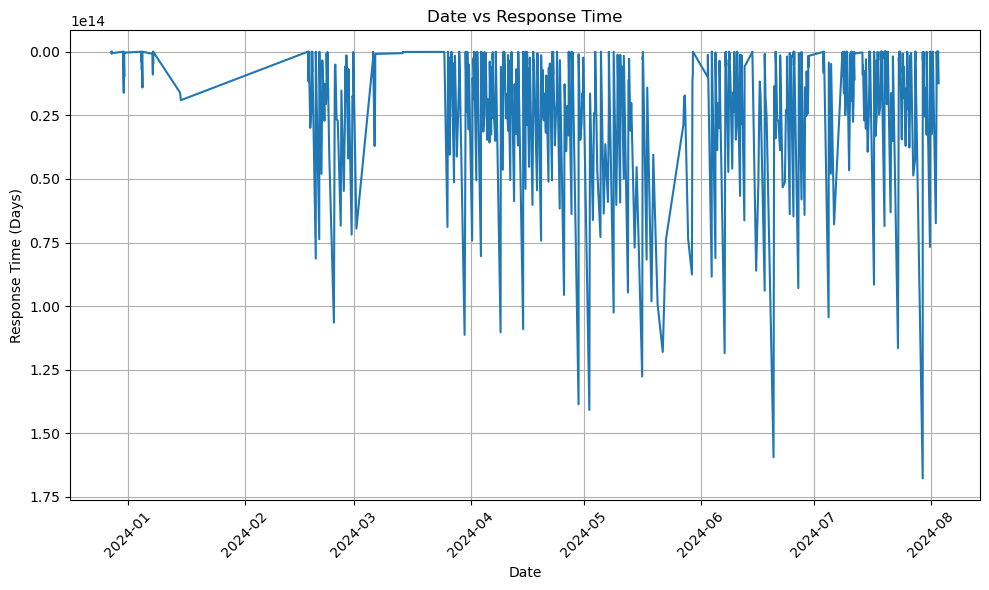

In [7]:
imsg_df['response time'] = responseTimeColumn(imsg_df)
plot_date_vs_response_time(imsg_df.copy(), 'date', 'response time', 'platform')


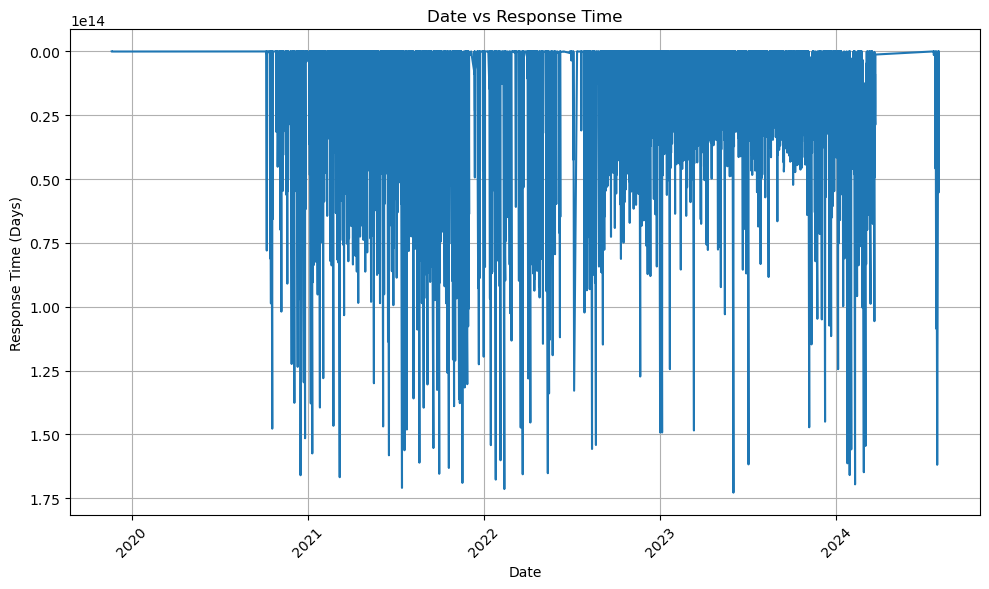

In [8]:
discord_df['response time'] = responseTimeColumn(discord_df)
plot_date_vs_response_time(discord_df.copy(), 'date', 'response time', 'platform')


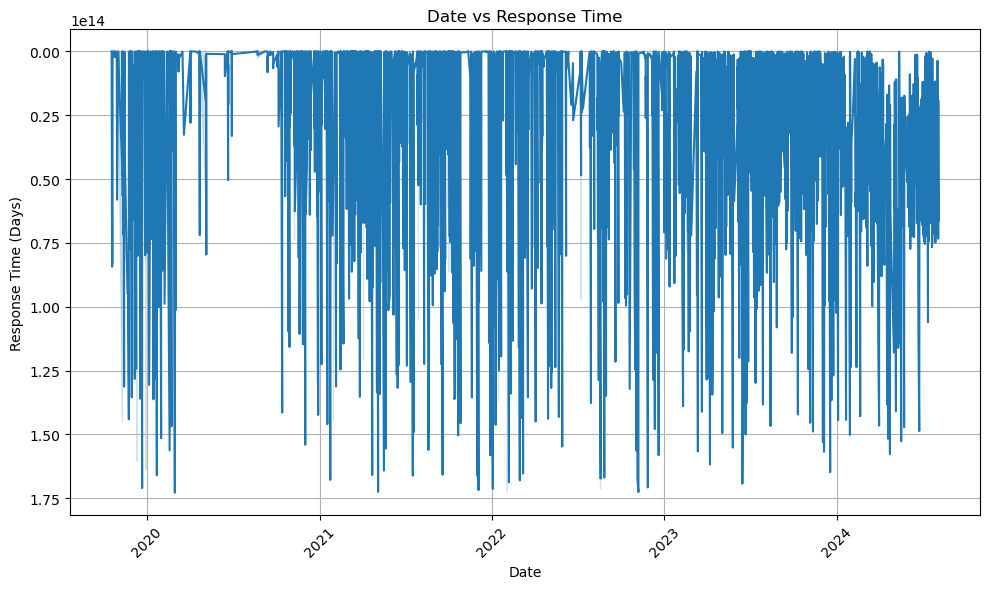

In [9]:
ig_df['response time'] = responseTimeColumn(ig_df)
plot_date_vs_response_time(ig_df.copy(), 'date', 'response time', 'platform')


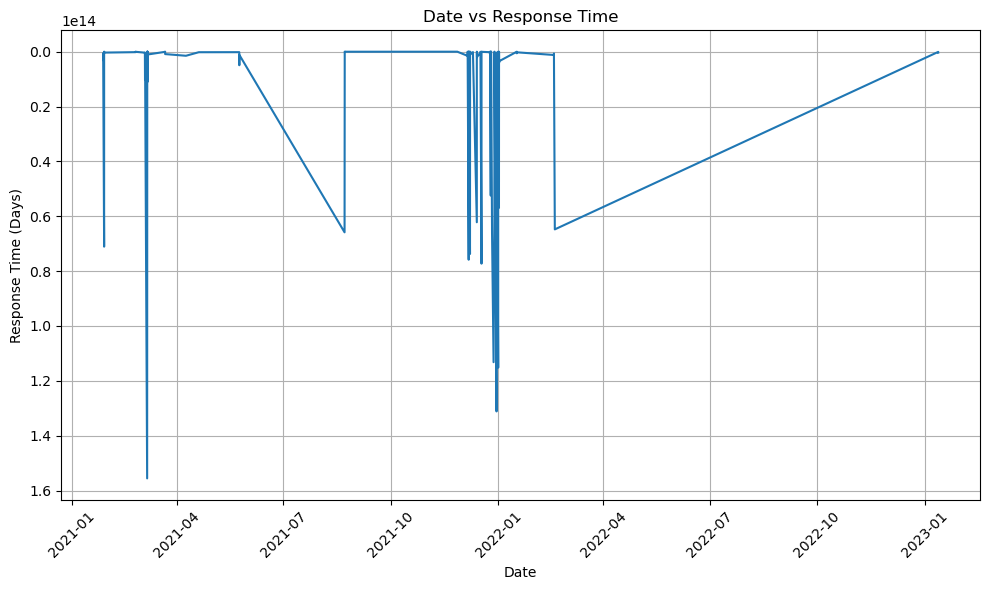

In [10]:
msngr_df['response time'] = responseTimeColumn(msngr_df)
plot_date_vs_response_time(msngr_df.copy(), 'date', 'response time', 'platform')

In [11]:
#mean response time by platform
#highest and lowest response time
import pandas as pd

def calculate_statistics(df, platform_col, response_time_col):
    """
    Calculates statistics for a DataFrame with different platform values and their corresponding response times.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    platform_col (str): Name of the column containing platform names.
    response_time_col (str): Name of the column containing response time values.
    
    Returns:
    pd.DataFrame: Mean response time by platform.
    dict: Highest and lowest response times.
    """
    # Ensure response time is in Timedelta format
    if pd.api.types.is_numeric_dtype(df[response_time_col]):
        df[response_time_col] = pd.to_timedelta(df[response_time_col], unit='D')
    elif not pd.api.types.is_timedelta64_dtype(df[response_time_col]):
        raise ValueError(f"The column {response_time_col} is neither a timedelta nor numeric")

    # Calculate mean response time by platform
    mean_response_time_by_platform = df.groupby(platform_col)[response_time_col].mean().reset_index()
    mean_response_time_by_platform.columns = [platform_col, 'Mean Response Time']
    
    # Find the highest and lowest response times
    highest_response_time = df[response_time_col].max()
    lowest_response_time = df[response_time_col].min()

    # Create a dictionary for the highest and lowest response times
    response_time_stats = {
        'Highest Response Time': highest_response_time,
        'Lowest Response Time': lowest_response_time
    }
    
    return mean_response_time_by_platform, response_time_stats

# Example usage
# Assuming your DataFrame is `imsg_df` with columns 'platform' and 'response time'
mean_response_time, response_time_stats = calculate_statistics(mega, 'platform', 'response time')

print("Mean Response Time by Platform:")
print(mean_response_time)

print("\nHighest and Lowest Response Times:")
print(response_time_stats)



Mean Response Time by Platform:
    platform         Mean Response Time
0    Discord  0 days 14:39:12.355492229
1   IMessage  2 days 05:56:51.585147246
2  Instagram  5 days 16:57:05.916870415
3  Messenger 69 days 12:28:38.870813397

Highest and Lowest Response Times:
{'Highest Response Time': Timedelta('11905 days 21:17:12.000000004'), 'Lowest Response Time': Timedelta('0 days 00:00:00')}


In [34]:
print(mega['platform'])

77085    Messenger
69722    Instagram
69723    Instagram
69724    Instagram
69725    Instagram
           ...    
69720     IMessage
69721     IMessage
77084    Instagram
77504    Messenger
77505    Messenger
Name: platform, Length: 77506, dtype: object


In [35]:
def calculate_monthly_mean_response_time(df, date_col, response_time_col, platform_col):
    """
    Calculates the mean response time by month and platform for a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    date_col (str): Name of the column containing date values.
    response_time_col (str): Name of the column containing response time values.
    platform_col (str): Name of the column containing platform values.

    Returns:
    pd.DataFrame: Mean response time by month and platform.
    """
    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Ensure response time is in Timedelta format
    if pd.api.types.is_numeric_dtype(df[response_time_col]):
        df[response_time_col] = pd.to_timedelta(df[response_time_col], unit='D')
    elif not pd.api.types.is_timedelta64_dtype(df[response_time_col]):
        raise ValueError(f"The column {response_time_col} is neither a timedelta nor numeric")
    
    # Extract year and month from the date column
    df['YearMonth'] = df[date_col].dt.to_period('M')

    # Calculate mean response time by year, month, and platform
    monthly_mean_response_time = df.groupby(['YearMonth', platform_col])[response_time_col].mean().reset_index()
    monthly_mean_response_time.columns = ['YearMonth', 'Platform', 'Mean Response Time']

    return monthly_mean_response_time


# Example usage
# Assuming your DataFrame is `imsg_df` with columns 'date' and 'response time'
monthly_mean_response_time = calculate_monthly_mean_response_time(mega, 'date', 'response time', 'platform')
print("Mean Response Time by Month:")
print(monthly_mean_response_time)


Mean Response Time by Month:
    YearMonth   Platform        Mean Response Time
0     2019-09  Messenger                       NaT
1     2019-10  Instagram 1 days 20:19:33.909090907
2     2019-11    Discord 0 days 02:35:26.666666666
3     2019-11  Instagram 0 days 08:23:59.090909089
4     2019-12  Instagram 0 days 03:40:05.024630540
..        ...        ...                       ...
122   2024-07    Discord 0 days 00:02:19.023404254
123   2024-07   IMessage 0 days 00:17:25.999999999
124   2024-07  Instagram 0 days 06:27:09.884615384
125   2024-08   IMessage 0 days 00:11:44.953703703
126   2024-08  Instagram 0 days 07:09:54.199999999

[127 rows x 3 columns]


C:\Users\Roo\AppData\Local\Temp\ipykernel_9028\3148105949.py:14: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['YearMonth']):


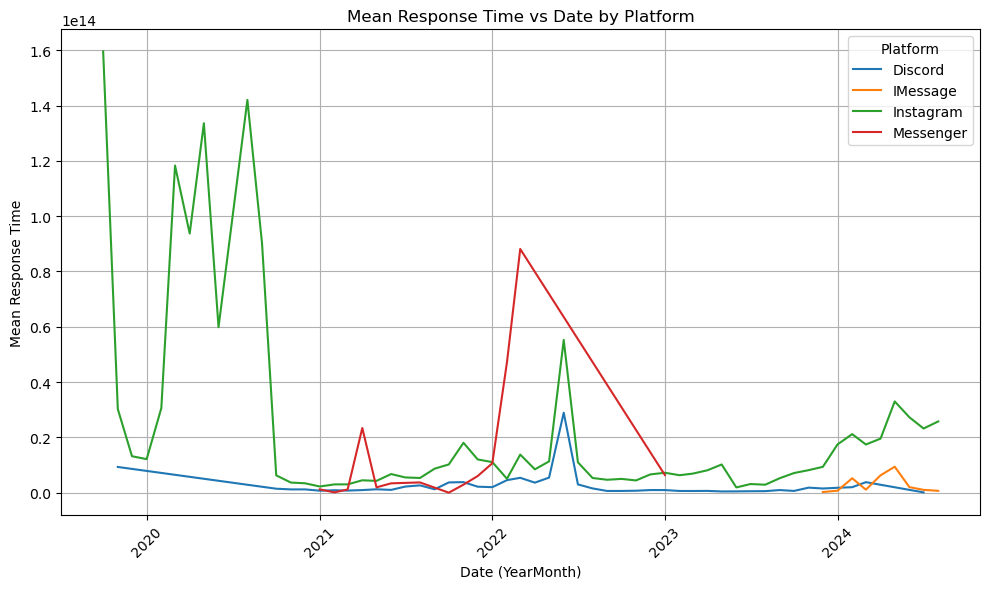

In [38]:
# Assuming df is your DataFrame
df = monthly_mean_response_time.copy()
# Assuming df is your DataFrame
df = monthly_mean_response_time.copy()

# Filter out rows with Mean Response Time greater than 2 days
two_days = pd.Timedelta(days=2)
df_filtered = df[df['Mean Response Time'] <= two_days]
df = df_filtered
# If 'YearMonth' is of PeriodDtype, convert it to timestamp
if pd.api.types.is_period_dtype(df['YearMonth']):
    df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(10, 6))

# Group by 'Platform' and plot each group
for platform, group in df.groupby('Platform'):
    plt.plot(group['YearMonth'], group['Mean Response Time'], label=platform)

# Set plot title and labels
plt.title('Mean Response Time vs Date by Platform')
plt.xlabel('Date (YearMonth)')
plt.ylabel('Mean Response Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish platforms
plt.legend(title='Platform')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()

plt.savefig(visuals_dir / 'mean response time vs date by platform')

plt.show()


C:\Users\Roo\AppData\Local\Temp\ipykernel_9028\834591889.py:12: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df['YearMonth']):


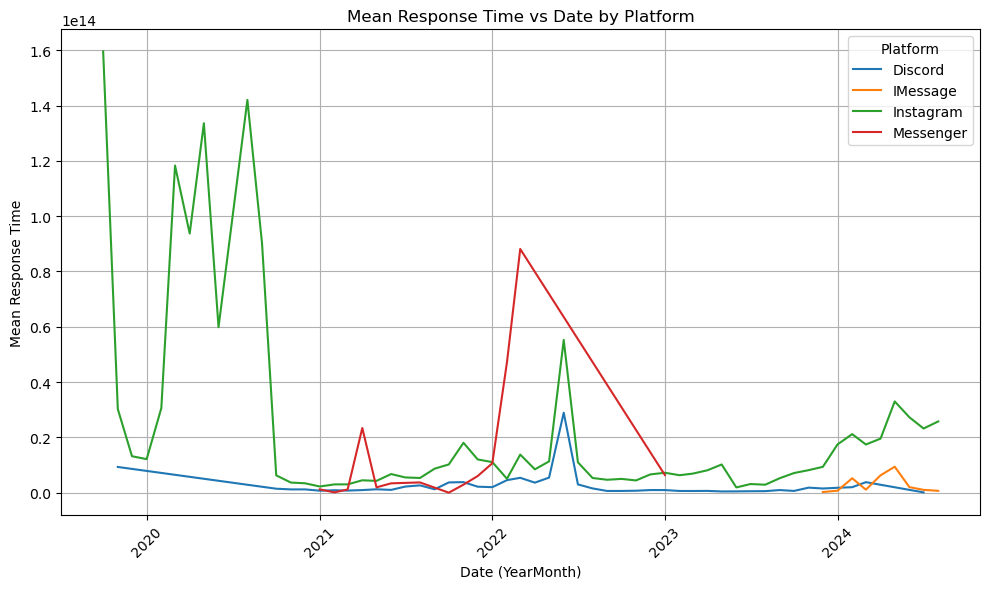

In [40]:
#with outliers
# Assuming df is your DataFrame
df = monthly_mean_response_time.copy()
# Assuming df is your DataFrame
df = monthly_mean_response_time.copy()

# Filter out rows with Mean Response Time greater than 2 days
two_days = pd.Timedelta(days=7)
df_filtered = df[df['Mean Response Time'] <= two_days]
df = df_filtered
# If 'YearMonth' is of PeriodDtype, convert it to timestamp
if pd.api.types.is_period_dtype(df['YearMonth']):
    df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(10, 6))

# Group by 'Platform' and plot each group
for platform, group in df.groupby('Platform'):
    plt.plot(group['YearMonth'], group['Mean Response Time'], label=platform)

# Set plot title and labels
plt.title('Mean Response Time vs Date by Platform')
plt.xlabel('Date (YearMonth)')
plt.ylabel('Mean Response Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish platforms
plt.legend(title='Platform')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()

plt.savefig(visuals_dir / 'mean response time vs date by platform')

plt.show()
